# Behavioural analysis

## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from matplotlib import cm
import psychopy
from psychopy.tools.filetools import fromFile

/Users/egor/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading the data:

In [2]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mc2_tgT-mcBv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
stairs = pd.DataFrame()
# matrices for intensities, responses, and means of reversals:
intns, resps, thisRevs, revMeans = [],[],[],[] 
orderInfo = pd.DataFrame() # subj, session, and stair info for ordering intns & resps

In [3]:
def detectRevs(thisDat):
    theseResps = np.array(thisDat.data)
    #print theseResps
    revInds = np.where(theseResps[:-1] != theseResps[1:])[0]
    #print revInds
    theseIntns = np.array(thisDat.intensities)
    #print theseIntns
    revIntns = theseIntns[revInds]
    #print revIntns
    return revIntns
def computeRevMeans(revIntns,nRevs):
    #print revIntns
    revLen = np.shape(revIntns)[0]
    #print revLen
    if revLen >= nRevs:
        return np.average(revIntns[-nRevs])
    else:
        return np.NAN

In [4]:
for subjDir in allSubjDirs:
    print subjDir
    subjStairsPath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    subjStairs = pd.read_csv(subjStairsPath)
    stairs = stairs.append(subjStairs)
    #print subjStairs
    for subjStairLabel in subjStairs['stairLabel']:
        print subjStairLabel #thisSubjStair['label']
        thisDat = fromFile(subjDir + '/' + subjStairLabel + '.psydat')
        intns.append(thisDat.intensities)
        resps.append(thisDat.data)
        theseRevIntns = detectRevs(thisDat)
        revMeans.append([computeRevMeans(theseRevIntns,4), 
                         computeRevMeans(theseRevIntns,6), 
                         computeRevMeans(theseRevIntns,8)])
        orderInfo = orderInfo.append(pd.DataFrame({
                    'sessionLabel': os.path.basename(subjStairsPath),
                    'stairLabel': [subjStairLabel]
                }))
        #print np.round(thisDat.intensities,2)
        #print thisDat.data # responses (correct/incorrect)
        #print thisDat.extraInfo

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_p0_s1_2017-01-23_1638
st--1_mcBv-0.01_targTpeak-0.5
st--2_mcBv-0.01_targTpeak-1.5
st--2_mcBv-4.8_targTpeak-1.0
st--2_mcBv-0.01_targTpeak-1.0
st--2_mcBv-4.8_targTpeak-0.5
st--1_mcBv-0.01_targTpeak-1.0
st--1_mcBv-4.8_targTpeak-0.5
st--1_mcBv-4.8_targTpeak-1.5
st--2_mcBv-4.8_targTpeak-1.5
st--2_mcBv-0.01_targTpeak-0.5
st--1_mcBv-0.01_targTpeak-1.5
st--1_mcBv-4.8_targTpeak-1.0


In [5]:
stairs['condLabel'] = 'mcBv-' + stairs.mcBv.astype(str) + '_' + \
                      'tgT-' + stairs.targTpeak.astype(str)
print stairs.shape
print stairs.columns
stairs.head(5)

(12, 26)
Index([u'expName', u'time', u'participant', u'session', u'nTrials', u'mcSz',
       u'mcSf', u'mcBv', u'mcBsf', u'mcPeriGap', u'mcPeriFade', u'targSz',
       u'targSf', u'targOri1', u'targOri2', u'targXoff', u'targYoff', u'targV',
       u'targTtot', u'targTpeak', u'trialT', u'fixCross', u'stairLabel',
       u'stairStart', u'stairMean', u'condLabel'],
      dtype='object')


,expName,time,participant,session,nTrials,mcSz,mcSf,mcBv,mcBsf,mcPeriGap,...,targYoff,targV,targTtot,targTpeak,trialT,fixCross,stairLabel,stairStart,stairMean,condLabel
0,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,256,0.1,0.01,0.05,112,...,0,0,1,0.5,2,0,st--1_mcBv-0.01_targTpeak-0.5,-1,-1.788327,mcBv-0.01_tgT-0.5
1,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,256,0.1,0.01,0.05,112,...,0,0,1,1.5,2,0,st--2_mcBv-0.01_targTpeak-1.5,-2,-3.365427,mcBv-0.01_tgT-1.5
2,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,256,0.1,4.80,0.05,112,...,0,0,1,1.0,2,0,st--2_mcBv-4.8_targTpeak-1.0,-2,-1.498615,mcBv-4.8_tgT-1.0
3,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,256,0.1,0.01,0.05,112,...,0,0,1,1.0,2,0,st--2_mcBv-0.01_targTpeak-1.0,-2,-2.593027,mcBv-0.01_tgT-1.0
4,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,256,0.1,4.80,0.05,112,...,0,0,1,0.5,2,0,st--2_mcBv-4.8_targTpeak-0.5,-2,-3.293771,mcBv-4.8_tgT-0.5


In [6]:
print np.shape(resps)
print np.shape(intns)
print np.shape(revMeans)
orderInfo = orderInfo.reset_index(drop=True)
print orderInfo.shape
orderInfo.head(5)

(12, 30)
(12, 30)
(12, 3)
(12, 2)


,sessionLabel,stairLabel
0,mc2_tgT-mcBv_p0_s1_2017-01-23_1638.csv,st--1_mcBv-0.01_targTpeak-0.5
1,mc2_tgT-mcBv_p0_s1_2017-01-23_1638.csv,st--2_mcBv-0.01_targTpeak-1.5
2,mc2_tgT-mcBv_p0_s1_2017-01-23_1638.csv,st--2_mcBv-4.8_targTpeak-1.0
3,mc2_tgT-mcBv_p0_s1_2017-01-23_1638.csv,st--2_mcBv-0.01_targTpeak-1.0
4,mc2_tgT-mcBv_p0_s1_2017-01-23_1638.csv,st--2_mcBv-4.8_targTpeak-0.5


Combining the trial data into a tall df.

In [7]:
nTrials = np.shape(resps)[1]
nStairs = np.shape(resps)[0]
orderInfoRepd = orderInfo.loc[np.repeat(orderInfo.index.values,nTrials)]
print orderInfoRepd.shape
orderInfoRepd = orderInfoRepd.reset_index(drop=True)
orderInfoRepd['trialN'] = np.tile(np.linspace(1,nTrials,nTrials),nStairs)
orderInfoRepd['intns'] = np.array(intns).flatten()
orderInfoRepd['resps'] = np.array(resps).flatten()
trials = pd.merge(orderInfoRepd, stairs, on='stairLabel')
trials.head(5)

(360, 2)


,sessionLabel,stairLabel,trialN,intns,resps,expName,time,participant,session,nTrials,...,targXoff,targYoff,targV,targTtot,targTpeak,trialT,fixCross,stairStart,stairMean,condLabel
0,mc2_tgT-mcBv_p0_s1_2017-01-23_1638.csv,st--1_mcBv-0.01_targTpeak-0.5,1.0,-1.000000,1,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,...,0,0,0,1,0.5,2,0,-1,-1.788327,mcBv-0.01_tgT-0.5
1,mc2_tgT-mcBv_p0_s1_2017-01-23_1638.csv,st--1_mcBv-0.01_targTpeak-0.5,2.0,-1.619512,0,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,...,0,0,0,1,0.5,2,0,-1,-1.788327,mcBv-0.01_tgT-0.5
2,mc2_tgT-mcBv_p0_s1_2017-01-23_1638.csv,st--1_mcBv-0.01_targTpeak-0.5,3.0,-1.232500,1,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,...,0,0,0,1,0.5,2,0,-1,-1.788327,mcBv-0.01_tgT-0.5
3,mc2_tgT-mcBv_p0_s1_2017-01-23_1638.csv,st--1_mcBv-0.01_targTpeak-0.5,4.0,-1.371732,1,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,...,0,0,0,1,0.5,2,0,-1,-1.788327,mcBv-0.01_tgT-0.5
4,mc2_tgT-mcBv_p0_s1_2017-01-23_1638.csv,st--1_mcBv-0.01_targTpeak-0.5,5.0,-1.461915,1,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,...,0,0,0,1,0.5,2,0,-1,-1.788327,mcBv-0.01_tgT-0.5


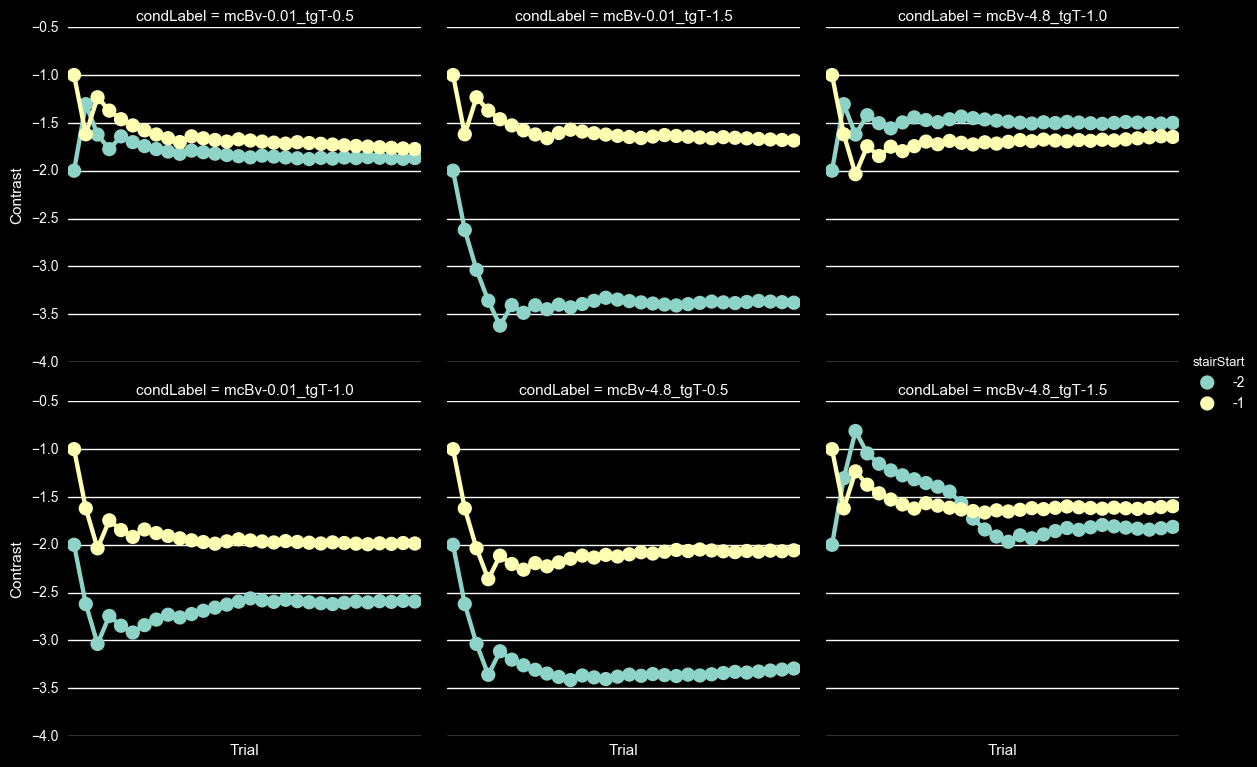

In [14]:
g = sns.factorplot(x='trialN', y='intns', hue='stairStart', col='condLabel', data=trials, 
               col_wrap=3, ci=None)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
#plt.ylim(-0.1,1.1)

In [9]:
print np.shape(revMeans)
meanRevsDF = pd.DataFrame({
    'meanRevs4': np.array(revMeans)[:,0],
    'meanRevs6': np.array(revMeans)[:,1],
    'meanRevs8': np.array(revMeans)[:,2] })
orderedRevMeans = pd.concat([meanRevsDF, orderInfo], axis=1)
#orderedRevMeans.head(5)
stairsWithRevs = pd.merge(orderedRevMeans, stairs, on='stairLabel')
stairsWithRevs.head(5)

(12, 3)


,meanRevs4,meanRevs6,meanRevs8,sessionLabel,stairLabel,expName,time,participant,session,nTrials,...,targXoff,targYoff,targV,targTtot,targTpeak,trialT,fixCross,stairStart,stairMean,condLabel
0,-1.678920,-1.660168,-1.000000,mc2_tgT-mcBv_p0_s1_2017-01-23_1638.csv,st--1_mcBv-0.01_targTpeak-0.5,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,...,0,0,0,1,0.5,2,0,-1,-1.788327,mcBv-0.01_tgT-0.5
1,-3.382260,-3.360666,-3.448696,mc2_tgT-mcBv_p0_s1_2017-01-23_1638.csv,st--2_mcBv-0.01_targTpeak-1.5,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,...,0,0,0,1,1.5,2,0,-2,-3.365427,mcBv-0.01_tgT-1.5
2,-1.503853,-1.493837,-1.497809,mc2_tgT-mcBv_p0_s1_2017-01-23_1638.csv,st--2_mcBv-4.8_targTpeak-1.0,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,...,0,0,0,1,1.0,2,0,-2,-1.498615,mcBv-4.8_tgT-1.0
3,-2.593965,-2.611069,-2.581093,mc2_tgT-mcBv_p0_s1_2017-01-23_1638.csv,st--2_mcBv-0.01_targTpeak-1.0,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,...,0,0,0,1,1.0,2,0,-2,-2.593027,mcBv-0.01_tgT-1.0
4,-3.357717,-3.362685,-3.357277,mc2_tgT-mcBv_p0_s1_2017-01-23_1638.csv,st--2_mcBv-4.8_targTpeak-0.5,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,...,0,0,0,1,0.5,2,0,-2,-3.293771,mcBv-4.8_tgT-0.5


In [10]:
condRevMeans = stairsWithRevs.groupby('condLabel')['meanRevs4','meanRevs6','meanRevs8'].mean()
condRevMeans['condLabel'] = condRevMeans.index
condRevMeans = condRevMeans.reset_index(drop=True)
condRevMeans.head(6)

,meanRevs4,meanRevs6,meanRevs8,condLabel
0,-1.770579,-1.763151,-1.435151,mcBv-0.01_tgT-0.5
1,-2.291072,-2.294723,-2.273305,mcBv-0.01_tgT-1.0
2,-2.515043,-2.490961,-2.224348,mcBv-0.01_tgT-1.5
3,-2.711332,-2.715537,-2.705678,mcBv-4.8_tgT-0.5
4,-1.595886,-1.593567,-1.594506,mcBv-4.8_tgT-1.0
5,-1.720032,-1.759237,-1.776611,mcBv-4.8_tgT-1.5


In [11]:
stairsClean = stairs.drop(['stairStart','stairMean','stairLabel'],axis=1,inplace=False)
stairsClean.drop_duplicates(inplace=True)
conds = pd.merge(condRevMeans, stairsClean, how='inner', on='condLabel')
print conds.columns
conds.head(7)

Index([u'meanRevs4', u'meanRevs6', u'meanRevs8', u'condLabel', u'expName',
       u'time', u'participant', u'session', u'nTrials', u'mcSz', u'mcSf',
       u'mcBv', u'mcBsf', u'mcPeriGap', u'mcPeriFade', u'targSz', u'targSf',
       u'targOri1', u'targOri2', u'targXoff', u'targYoff', u'targV',
       u'targTtot', u'targTpeak', u'trialT', u'fixCross'],
      dtype='object')


,meanRevs4,meanRevs6,meanRevs8,condLabel,expName,time,participant,session,nTrials,mcSz,...,targSf,targOri1,targOri2,targXoff,targYoff,targV,targTtot,targTpeak,trialT,fixCross
0,-1.770579,-1.763151,-1.435151,mcBv-0.01_tgT-0.5,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,256,...,0.2,-45,45,0,0,0,1,0.5,2,0
1,-2.291072,-2.294723,-2.273305,mcBv-0.01_tgT-1.0,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,256,...,0.2,-45,45,0,0,0,1,1.0,2,0
2,-2.515043,-2.490961,-2.224348,mcBv-0.01_tgT-1.5,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,256,...,0.2,-45,45,0,0,0,1,1.5,2,0
3,-2.711332,-2.715537,-2.705678,mcBv-4.8_tgT-0.5,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,256,...,0.2,-45,45,0,0,0,1,0.5,2,0
4,-1.595886,-1.593567,-1.594506,mcBv-4.8_tgT-1.0,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,256,...,0.2,-45,45,0,0,0,1,1.0,2,0
5,-1.720032,-1.759237,-1.776611,mcBv-4.8_tgT-1.5,mc2_tgT-mcBv,2017-01-23_1638,0,1,30,256,...,0.2,-45,45,0,0,0,1,1.5,2,0


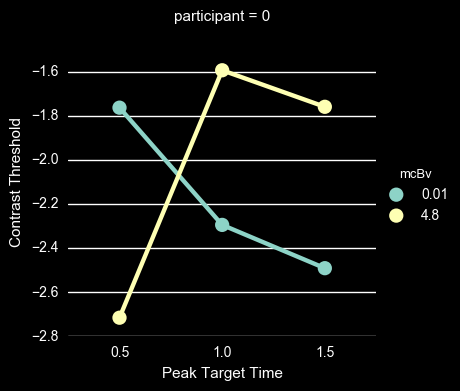

In [12]:
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='mcBv', col='participant', data=conds, 
               ci=None)
g.set_axis_labels('Peak Target Time','Contrast Threshold')
#g.set(xticks=[])
#plt.ylim(-0.1,1.1)